In [1]:
import numpy as np
import scipy.special as sc
import statistics as st
import random
import pandas as pd
import multiprocessing as mp
from multiprocessing import Pool, Manager, Value
from functools import partial
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
df10 = pd.read_csv('FieldNP00eta0010.dat', delimiter = '   ', engine = 'python', names=['k','n0', 'n1', 'n2', 'n3', 'n_avg']) 

In [3]:
df10

,k,n0,n1,n2,n3,n_avg
0,0.000000,142304.644104,2.159692e+06,2.160837e+06,2.150437e+06,2.156989e+06
1,10.882796,-0.165056,-4.430580e-01,-4.509275e-01,-2.200205e-01,-3.713354e-01
2,21.765592,-0.184674,-3.970810e-01,-4.255465e-01,-4.840820e-01,-4.355698e-01
3,32.648389,-0.487135,5.970125e-01,-4.197419e-01,-4.665517e-01,-9.642703e-02
4,43.531185,-0.373003,1.903944e-01,-4.437113e-01,-4.272458e-01,-2.268543e-01
5,54.413981,-0.484786,-1.909907e-01,1.047084e-01,1.337054e+01,4.428087e+00
6,65.296777,-0.328000,-2.730183e-01,-4.650339e-01,-4.739026e-01,-4.039849e-01
7,76.179573,-0.043999,-4.983014e-01,-4.791017e-01,3.828194e-02,-3.130404e-01
8,87.062369,-0.419405,4.834327e-02,-4.964123e-01,-4.855354e-01,-3.112015e-01
9,97.945166,-0.327786,-4.443876e-01,-4.874538e-01,-4.450131e-01,-4.589515e-01


In [4]:
df100 = pd.read_csv('FieldNP00eta0100.dat', delimiter = '   ', engine = 'python', names=['k','n0', 'n1', 'n2', 'n3', 'n_avg']) 

In [5]:
df100

,k,n0,n1,n2,n3,n_avg
0,0.000000,52744.901198,181654.342542,179576.915820,180977.999492,180736.419285
1,10.882796,0.219524,-0.463983,-0.285197,0.186117,-0.187688
2,21.765592,-0.445924,-0.451619,-0.352547,0.690364,-0.037934
3,32.648389,-0.344568,-0.461614,-0.494846,-0.392356,-0.449605
4,43.531185,-0.470227,-0.180196,-0.256567,-0.370109,-0.268957
5,54.413981,-0.331289,0.047885,-0.028886,1.285070,0.434690
6,65.296777,0.631204,-0.355995,-0.443967,-0.419203,-0.406388
7,76.179573,-0.357569,-0.487256,-0.398658,-0.134301,-0.340072
8,87.062369,-0.462436,-0.415458,-0.490766,-0.489605,-0.465276
9,97.945166,-0.340053,0.331916,-0.424923,-0.490647,-0.194551


In [6]:
df1000 = pd.read_csv('FieldNP00eta1000.dat', delimiter = '   ', engine = 'python', names=['k','n0', 'n1', 'n2', 'n3', 'n_avg']) 

In [7]:
df1000

,k,n0,n1,n2,n3,n_avg
0,0.000000,127956.064069,1.119624e+06,1.125420e+06,1.110953e+06,1.118666e+06
1,10.882796,-0.356987,-2.138023e-01,-4.771153e-01,1.704559e+00,3.378804e-01
2,21.765592,-0.284247,-4.956114e-01,-4.599068e-01,-2.042407e-01,-3.865863e-01
3,32.648389,-0.329326,-3.359238e-01,-2.739532e-01,-4.665665e-01,-3.588145e-01
4,43.531185,0.160853,-4.372719e-01,-3.496928e-01,-7.667310e-02,-2.878793e-01
5,54.413981,-0.423294,-3.345353e-01,7.470121e-01,3.078289e+00,1.163589e+00
6,65.296777,-0.486675,-4.819954e-01,-4.972423e-01,-4.815577e-01,-4.869318e-01
7,76.179573,-0.040248,-4.442752e-01,-3.820981e-01,-4.311878e-01,-4.191870e-01
8,87.062369,-0.353235,-4.584729e-01,4.667002e-01,-4.640446e-01,-1.519391e-01
9,97.945166,-0.303114,-3.026682e-01,-7.744514e-02,-1.448391e-01,-1.749842e-01


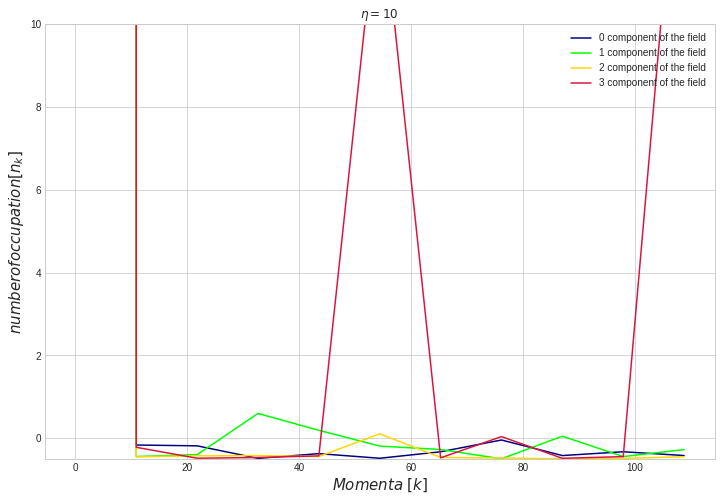

In [8]:
plt.figure(figsize=(12,8))
plt.plot(df10.k, df10.n0, color = 'navy', label = '0 component of the field')
plt.plot(df10.k, df10.n1, color = 'lime', label = '1 component of the field')
plt.plot(df10.k, df10.n2, color = 'gold', label = '2 component of the field')
plt.plot(df10.k, df10.n3, color = 'crimson', label = '3 component of the field')
plt.xlabel('$Momenta \; [k]$', fontsize = 15 )
plt.legend(loc = 1)
plt.ylim(-0.5,10)
plt.ylabel('$number of occupation [n_k]$', fontsize = 15)
plt.title(r'$\eta = 10$')
plt.savefig('nk_10.png',dpi=500)

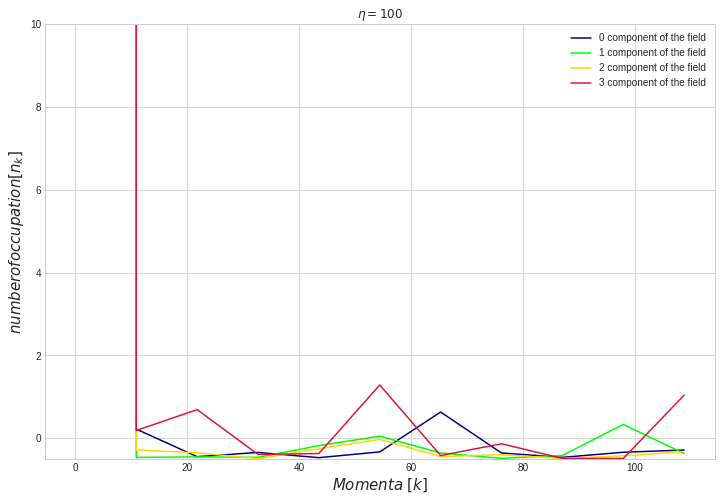

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df100.k, df100.n0, color = 'navy', label = '0 component of the field')
plt.plot(df100.k, df100.n1, color = 'lime', label = '1 component of the field')
plt.plot(df100.k, df100.n2, color = 'gold', label = '2 component of the field')
plt.plot(df100.k, df100.n3, color = 'crimson', label = '3 component of the field')
plt.xlabel('$Momenta \; [k]$', fontsize = 15 )
plt.legend(loc = 1)
plt.ylim(-0.5,10)
plt.ylabel('$number of occupation [n_k]$', fontsize = 15)
plt.title(r'$\eta = 100$')
plt.savefig('nk_100.png',dpi=500)

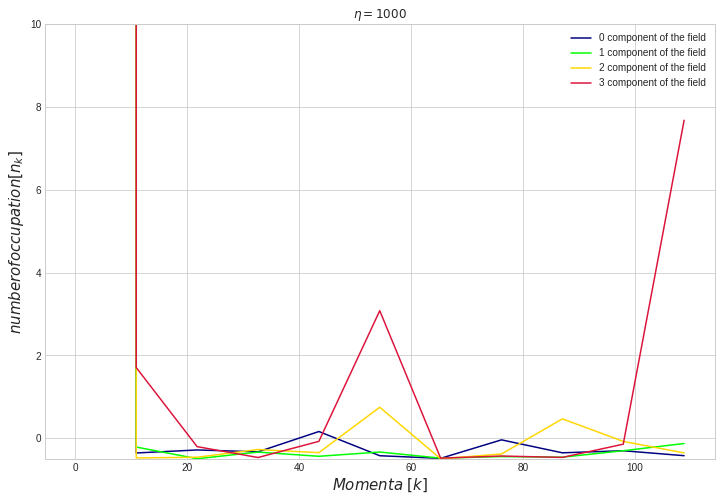

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df1000.k, df1000.n0, color = 'navy', label = '0 component of the field')
plt.plot(df1000.k, df1000.n1, color = 'lime', label = '1 component of the field')
plt.plot(df1000.k, df1000.n2, color = 'gold', label = '2 component of the field')
plt.plot(df1000.k, df1000.n3, color = 'crimson', label = '3 component of the field')
plt.xlabel('$Momenta \; [k]$', fontsize = 15 )
plt.legend(loc = 1)
plt.ylim(-0.5,10)
plt.ylabel('$number of occupation [n_k]$', fontsize = 15)
plt.title(r'$\eta = 1000$')
plt.savefig('nk_1000.png',dpi=500)

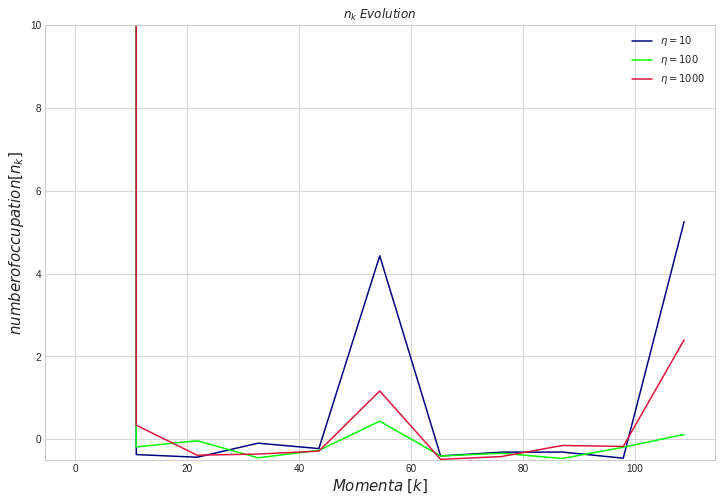

In [11]:
plt.figure(figsize=(12,8))
plt.plot(df10.k, df10.n_avg, color = 'navy', label = r'$\eta = 10$')
plt.plot(df100.k, df100.n_avg, color = 'lime', label = r'$\eta = 100$')
plt.plot(df1000.k, df1000.n_avg, color = 'crimson', label = r'$\eta = 1000$')
plt.xlabel('$Momenta \; [k]$', fontsize = 15 )
plt.legend(loc = 1)
plt.ylim(-0.5,10)
plt.ylabel('$number of occupation [n_k]$', fontsize = 15)
plt.title(r'$n_k \; Evolution$')
plt.savefig('nk_avgVSeta.png',dpi=500)